<a href="https://colab.research.google.com/github/joseph-c-mcguire/Thesis/blob/main/Thesis_Graph_Generation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip3 install pmdarima

     |████████████████████████████████| 1.4 MB 7.6 MB/s 
     |████████████████████████████████| 9.8 MB 46.9 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


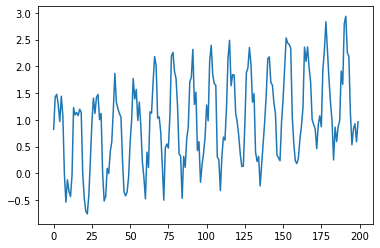

In [ ]:
import statsmodels.api as ts
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

N = 100
R = np.random.rand(2*N)
T = np.sin(np.linspace(0,N,2*N)) + np.linspace(0,N,2*N)/N

plt.figure()
plt.plot(T + R)
plt.

In [ ]:
import multiprocessing
import time


def sumall(value):
    return sum(range(1, value + 1))

pool_obj = multiprocessing.Pool()

start = time.clock()
answer = pool_obj.map(sumall,range(0,5))
end = time.clock()
print(end - start)

start = time.clock()
for i in range(0,5):
  sumall(i)
end = time.clock()
print(end - start)
print(answer)
print()


0.003319000000001182
0.00012900000000115597
[0, 1, 3, 6, 10]



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


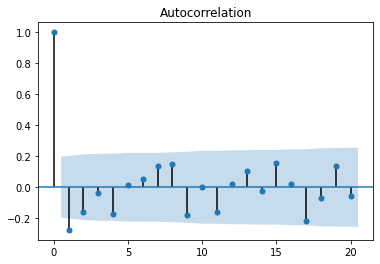

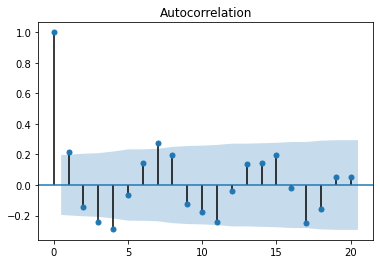

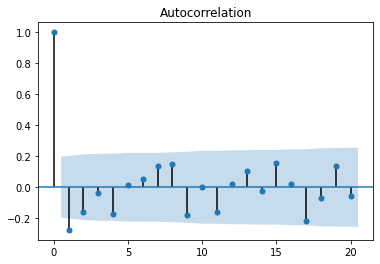

In [ ]:
import numpy as np 
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd

N = 100
y = pd.DataFrame(np.random.normal(size = N))
x = np.array(range(N))
y = y.loc[:,0] + np.sin(np.pi * 2 * x / 7)

# plt.plot(y + np.sin(x/np.pi))
sm.graphics.tsa.plot_acf(y)
sm.graphics.tsa.plot_acf(y.diff().dropna())

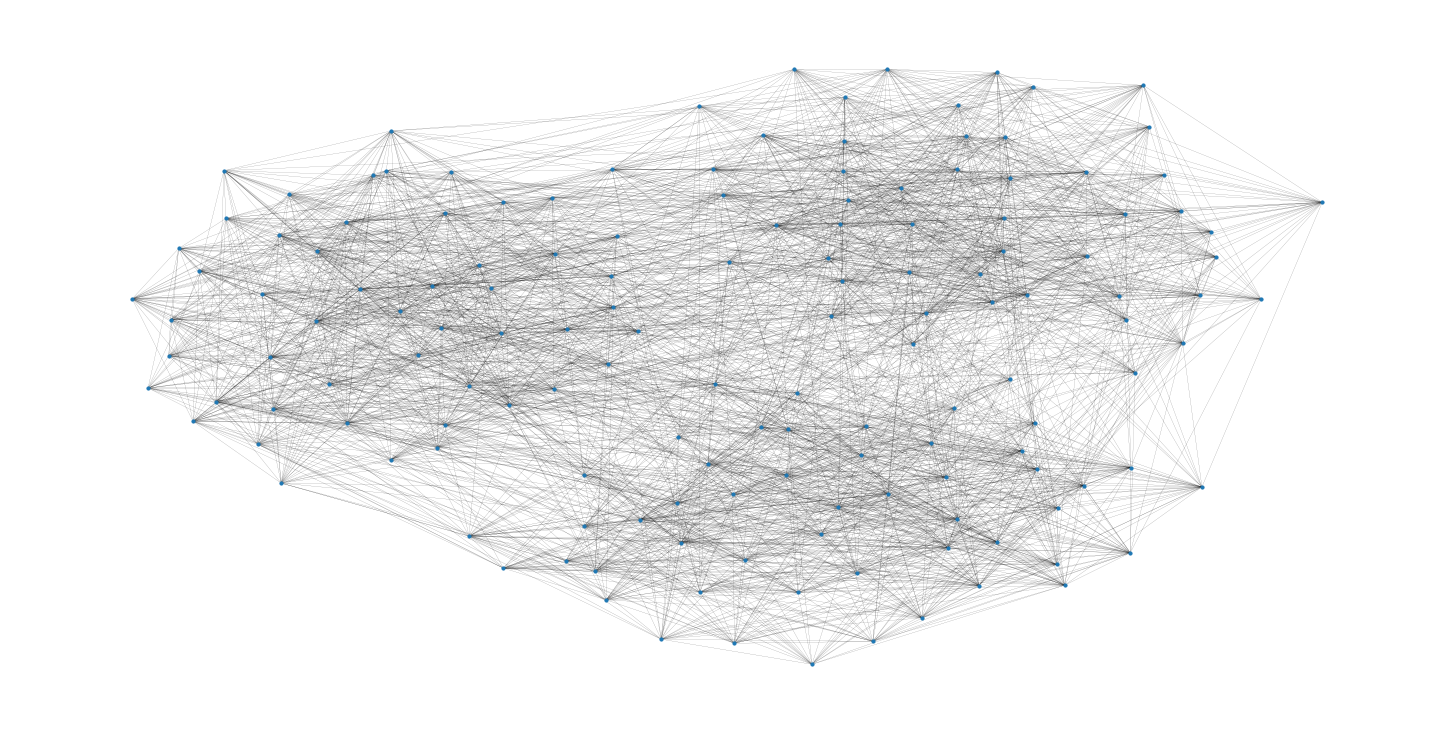

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.planted_partition_graph(3, 50, 0.5, 0.1, seed = 0)
plt.figure(figsize = (20,10))
nx.draw(G, node_size = 10, width = 0.1)
plt.savefig('random_graph.png')

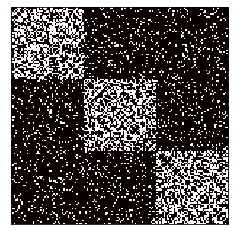

In [ ]:
a = nx.to_numpy_matrix(G)
plt.imshow(a, cmap='hot', interpolation='nearest')
plt.xticks([])
plt.yticks([])
plt.savefig('heat_map.png')

(array([ 1., -1.,  0.]),
 array([[ 7.07106781e-01, -7.07106781e-01, -7.07106781e-01],
        [ 7.07106781e-01,  7.07106781e-01,  1.58187870e-17],
        [ 0.00000000e+00,  0.00000000e+00,  7.07106781e-01]]))

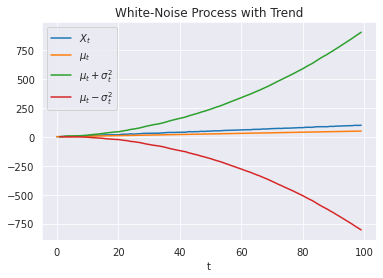

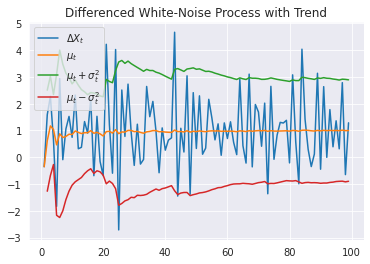

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sns.set_style('darkgrid')
np.random.seed(0)
N = 100
ones = np.ones(N)
# x = range(N)
y = pd.DataFrame(np.random.normal(0,1,N) + np.linspace(0,N,N))
# plt.figure(figsize = (10,10))
# plt.plot(x,y.values)
ax = y.plot()
plt.title('White-Noise Process with Trend')
plt.xlabel('t')
plt.legend([])
mean = y.expanding().mean()
mean.plot(ax = ax)
variance = y.expanding().var()
neg_variance = - variance
(variance + mean).plot(ax = ax)
(neg_variance + mean).plot(ax = ax)
plt.legend(['$X_t$', '$\mu_t$', '$\mu_t + \sigma_{t}^{2}$', '$ \mu_t -\sigma^{2}_{t}$'])
plt.savefig('trend_wn.png', Format = 'PNG')

diff = y.diff()
ax = diff.plot()
diff.expanding().mean().plot(ax = ax)
(diff.expanding().mean() + diff.expanding().var()).plot(ax = ax)
(diff.expanding().mean() - diff.expanding().var()).plot(ax = ax)
plt.title('Differenced White-Noise Process with Trend')
plt.legend(['$\Delta X_t$', '$\mu_t$', '$\mu_t + \sigma_t^2 $', '$\mu_t - \sigma_t^2$' ])
plt.savefig('diff_wn.png', Format = 'PNG')
# neg_variance.plot(ax = ax)
# plt.plot(x, y.expanding().mean() * ones, 'red')
# plt.plot(x, y.expanding().var() * ones, 'black')
# plt.plot(x, -y.expanding().var() * ones, 'black')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


(-1.0, 1.0)

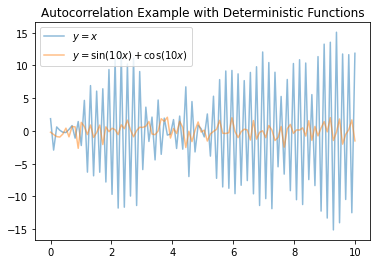

<Figure size 432x288 with 0 Axes>

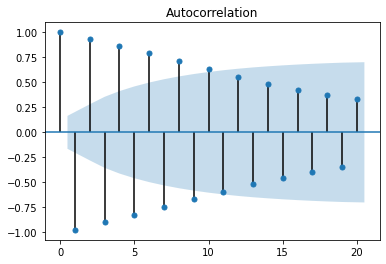

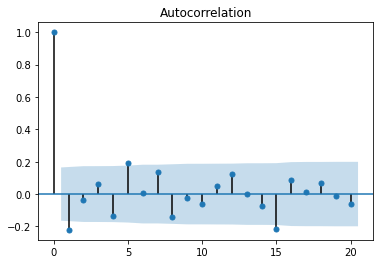

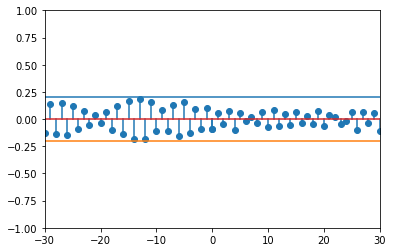

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

N = 100
x = np.linspace(0, 10,N)
random_effect_1 = sm.tsa.arma_generate_sample([1,1],[1,-1],N)
random_effect_2 = sm.tsa.arma_generate_sample([1,0.1],[1,-0.1],N)

y_1 = random_effect_1
y_2 = random_effect_2

plt.figure()
plt.plot(x,y_1, alpha = 0.5)
plt.plot(x,y_2, alpha = 0.5)
plt.title('Autocorrelation Example with Deterministic Functions')
plt.legend(['$y = x$', '$y = \sin(10x) + \cos(10x)$'])

plt.figure()
ax = sm.tsa.graphics.plot_acf(y_1, alpha = 0.1)
sm.tsa.graphics.plot_acf(y_2, alpha = 0.1)
plt.figure()
plt.stem(range(0,31),sm.tsa.ccf(y_1, y_2)[:31])
plt.stem(range(-30,1),np.flip(sm.tsa.ccf(y_2, y_1)[:31]))
plt.plot(range(-x.size, x.size), 2/np.sqrt(x.size) * np.ones(2*x.size))
plt.plot(range(-x.size, x.size), -2/np.sqrt(x.size) * np.ones(2*x.size))
plt.xlim([-30,30])
plt.ylim([-1,1])

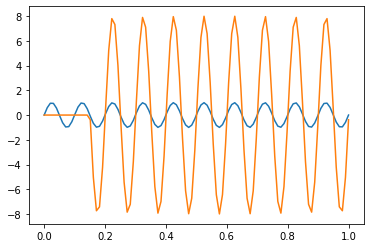

<Figure size 432x288 with 0 Axes>

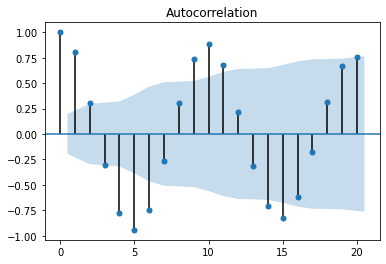

In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

x = np.linspace(0,1,100) 
y = pd.DataFrame(np.sin(x * 2 * np.pi / (0.1/(100)))).iloc[:,0]
plt.plot(np.linspace(0,1,100),y)
y_diff = y.diff(5).diff(5).diff(5).fillna(0)
plt.plot(np.linspace(0,1,100),y_diff)
plt.figure()
sm.tsa.graphics.plot_acf(y_diff)
plt.show()

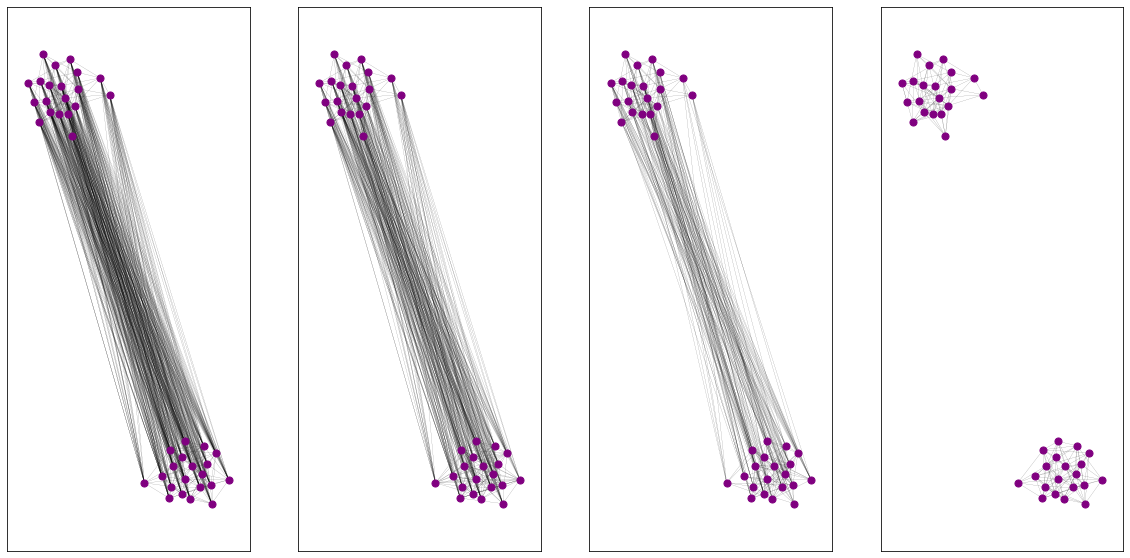

In [51]:
from networkx.algorithms.centrality.betweenness import edge_betweenness_centrality
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
N = 5
G = [nx.planted_partition_graph(2,20,p_in = 0.5, p_out = 1-k, seed = 0) for k in np.linspace(0,1,4)]
# nx.draw(G[0])
pos = [nx.spring_layout(H, seed = 0) for H in G]
# degree_centrality = 100*np.array([np.array(list(nx.degree_centrality(H).values())) for H in G])
# edge_betweenness_centrality = 10*np.array([np.array(list(edge_betweenness_centrality(H).values())) for H in G])

fig, ax = plt.subplots(1,N-1,figsize = (20,10))
for i in range(N - 1):
  nx.draw_networkx_nodes(G[i], pos = pos[-1], node_size = 50, ax = ax[i], node_color = 'Purple')
  nx.draw_networkx_edges(G[i], pos = pos[-1], width = 0.1, ax = ax[i])
plt.savefig('Dynamic_example.png')